# Monika Goyal
#The sparks foundation
#Task 2 #Predict the optimum number of clusters and represents it visually.

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('Iris.csv')

In [19]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Separate the features
features = data.iloc[:, 1:5].values

In [21]:
# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [23]:
# Perform K-means clustering for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\MY\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


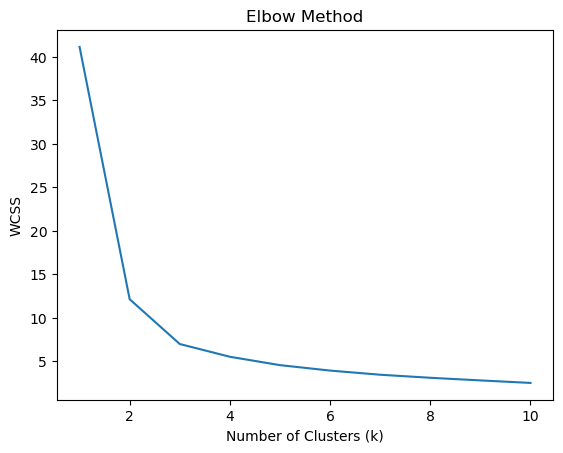

In [11]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Determine the optimum number of clusters
optimal_k = 3  
# Run K-means with optimal_k clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_features)


KMeans(n_clusters=3, random_state=42)

In [13]:
# Assign cluster labels to the data points
labels = kmeans.labels_

In [14]:
# Add cluster labels to the dataset
data['Cluster'] = labels

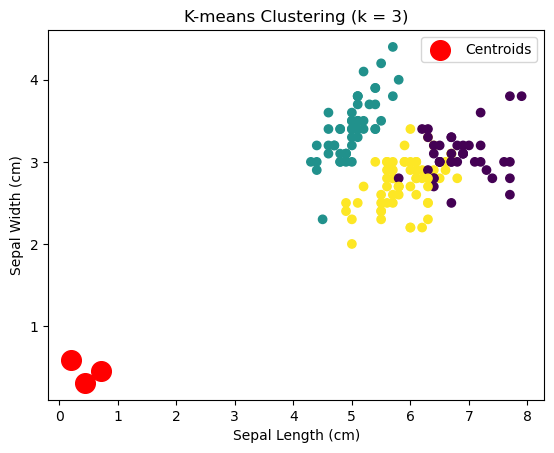

In [15]:
# Visualize the clusters
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering (k = {})'.format(optimal_k))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()